## Semesterarbeit MapReduce - Aufgabe 1

Philipp Dubach - CAS Big Data HS19/20

### Ausgangslage

Schreiben Sie ein MapReduce-Programm in Python (oder Java),<br>
welches den Throughput pro Minute bildet<br>
serverseitiges Log - nur mw_trace50 nehmen<br>
darin nur res_snd Records beachten<br>
zählen, wie res_snd pro Minute anfielen (dazu den time-Wert ohne Rest durch 1000*60 dividieren).<br>
die Werte als CSV-Datei ausgibt<br>
Stellen Sie die Entwicklung mit geeigneten Mitteln graphisch dar<br>

### Vorgehen

Ich habe mir die Aufgabe genau durchgelesen und dann den Datensatz angeschaut. <br>
Im Prinzip war mir klar, dass es genauu gleich wie das Hello World Beispiel Word_Count funktionieren muss.<br>
Die Aufgabe hat zudem noch der Hinweis wie der Schlüssel generiert werden muss, was das Ganze ein<br>
wenig einfach gestaltet.<br>
<br>
Ich wusste so auf Anhieb, dass der Schlüssel die Minute sein muss<br>
ob das so funktioniert wusste ich jedoch so noch nicht.<br>
<br>
Somit habe ich es einfach mal versucht den Schlüssel so zu setzen.<br>
Den Wert welchen ich aus dem Mapper rausgebe, war dann lediglich eine 1<br>
welche ich dann im Reducer auf die Minuten aufsummiere.<br>
<br>
Ich habe dann herausgefunden, dass ich den Mapper zum Debuggen einzeln laufen lassen kann,<br>
was mir das ganze System ein wenig klarer erscheinen liess. (Quelle: https://mrjob.readthedocs.io/en/latest/job.html)<br>
<br>
Output des Mappers war dann der Key(jede Minute) mit jedem Value welchen ich als 1 definiert hatte.<br>
Nun musste ich nur noch den Reducer dazu bringen, nach dem Key zu Gruppieren und die Aggregation auf meinen Values<br>
zu erzwingen.<br>
Dazu habe ich den Key vom Mapper wieder als Key gesetzt und den Value habe ich dann summiert.<br>
Hat alles auf Anhieb geklappt<br>
<br>
Damit das Script bei grösseren Daten effizienter auf den Cluster laufen kann,<br>
habe ich zwischen Mapper und Reducer noch einen Combiner eingesetzt.<br>
Dieser Reduziert dann jeweils seinen Block bereits auf dem jeweiligen Node und<br>
sendet dann den bereits reduzierten Datensatz an den Reducer.<br> 
<br>
Das Ganze habe ich mir dann in der Cli mittels stdout > als csv Datei abgespeichert.

### Ergebnis und Visualisation

Die Daten habe ich mir dann auf ein Git Repo gesendet und in Jupyther Lab gepullt,<br>
um den nachstehenden Code und dieses Dokument zu erstellen.

<b>Import Librarys</b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
%matplotlib inline

<b>CSV in Pandas Datenframe laden</b>

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/dubachphil/bigdata/master/throughtput_p_min.csv",
                   sep='\t',
                   names=["time","count"],
                  header=None)

<b>Daten prüfen<b>

In [4]:
data.head()

,time,count
0,1414252860,8755
1,1414252920,8707
2,1414252980,8687
3,1414253040,8458
4,1414253100,8463


In [5]:
data.describe()

,time,count
count,5.200000e+01,52.000000
mean,1.414252e+09,12501.788462
std,9.092854e+02,4440.705139
min,1.414251e+09,8096.000000
25%,1.414251e+09,9024.500000
50%,1.414252e+09,11029.500000
75%,1.414253e+09,14275.750000
max,1.414254e+09,25669.000000


<b>Erster Plot - Density Plot</b><br>
Der Plot zeigt wie der Anteil des Througtput pro Minute verteilt ist.<br>
Ähnlich des nächsten Histogamm Plot.<br>
Gemäss der oberen Tabelle ist das Maxima (50%) bei ca.11029 pro Minute<br>

Text(0, 0.5, 'Density')

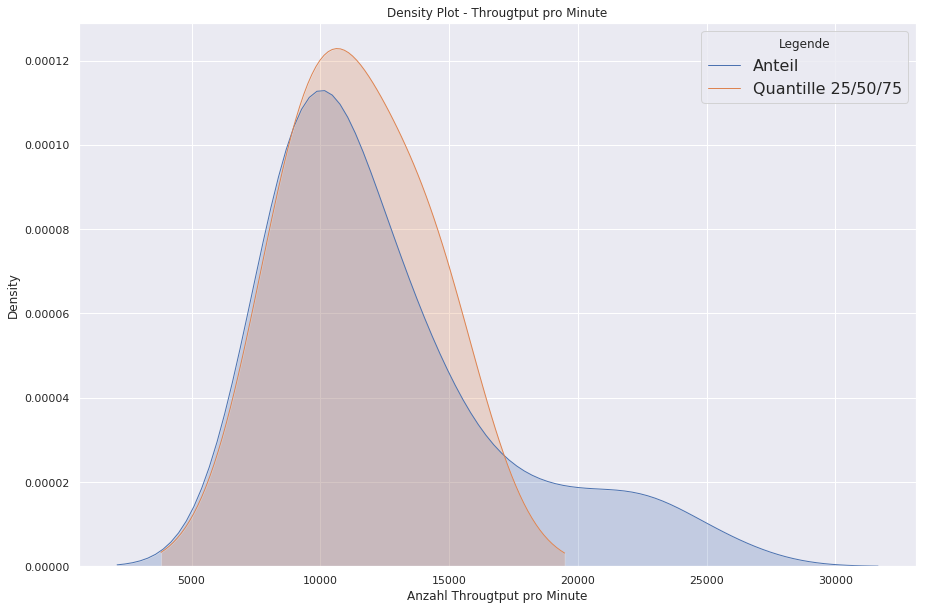

In [12]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(data["count"], hist=False, kde = True, kde_kws = {'shade': True, 'linewidth': 1}, label = "Anteil")
sns.distplot(data["count"].quantile([.25, .5, .75]), hist=False, kde = True, kde_kws = {'shade': True, 'linewidth': 1}, label = "Quantille 25/50/75")

plt.legend(prop={'size': 16}, title = 'Legende')
plt.title('Density Plot - Througtput pro Minute')
plt.xlabel('Anzahl Througtput pro Minute')
plt.ylabel('Density')

<b>Zweiter Plot - Histogramm Plot</b><br>
Der Plot zeigt im Gegensatz zum Densityplot die Häufigkeit der<br>
Througtput pro Minute

Text(0.5, 1.0, 'Histogramm - Häuigkeit der Anzahl Througtput pro Minute')

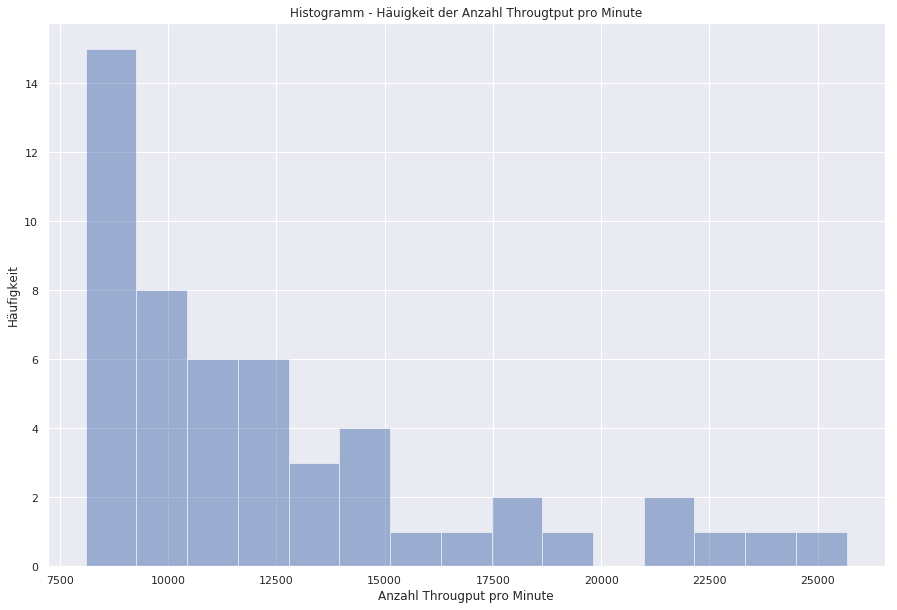

In [14]:
plt.figure(figsize=(15,10))
plt.hist(data["count"],alpha=0.5,bins=15)
plt.xlabel('Anzahl Througput pro Minute')
plt.ylabel('Häufigkeit')
plt.title('Histogramm - Häuigkeit der Anzahl Througtput pro Minute')

<b>Dritter Plot - Zeitreihe</b><br>
Anzahl Throughput pro Minute über die Zeit

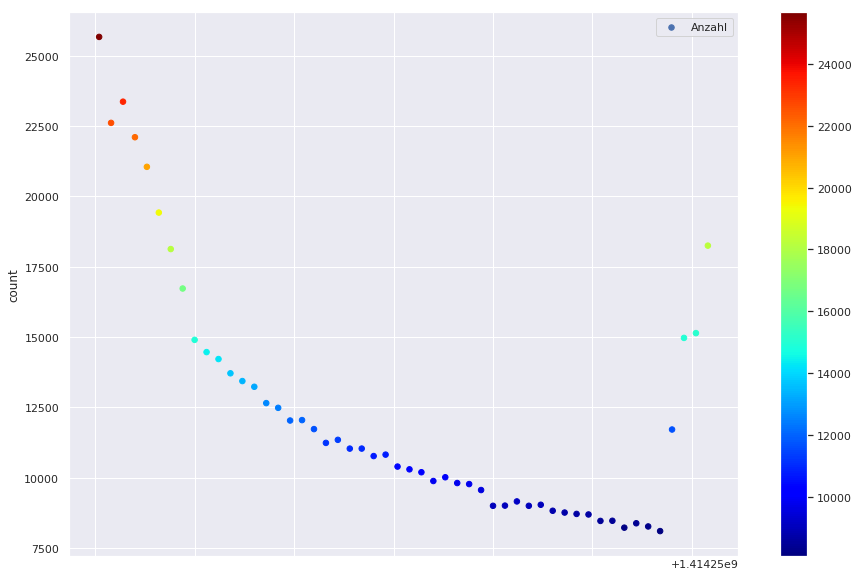

In [16]:
data.plot(kind="scatter",x="time",y="count", alpha=1,
            s=30, label="Anzahl", figsize=(15,10),
            c=data["count"], cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()